# Feature Engineer Lending Club Data 
## Data Prep Step 2 of 2 (2 of 5 overall)


- Drop unused columns
- Fix Data types
- Engineering Features

In [1]:
from __future__ import print_function 
from __future__ import division

# Load in our libraries
import pandas as pd
import numpy as np
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.tools as tls
import itertools
import datetime

import warnings
warnings.filterwarnings('ignore')

SEED = 42

# Flag to use external features or not
EXTERNALFEATURES = False

In [2]:
# Load in pre-processed data set with the 
df = pd.read_csv('LendingClub2017_2018BasicPrep.csv.gz',  compression='gzip')
df.sample(3)

,loan_amnt,term,int_rate,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
43630,16800.0,60 months,12.79,C,Paint Tech Team Lead,9 years,MORTGAGE,63000.0,Not Verified,2016-07-01,...,0.0,0.0,0.0,40.0,0.0,0.0,83607.0,73611.0,13700.0,67607.0
93943,16000.0,60 months,19.99,D,Marketing,< 1 year,MORTGAGE,175000.0,Source Verified,2016-12-01,...,0.0,0.0,2.0,40.0,0.0,0.0,359582.0,31535.0,26200.0,54089.0
116360,4400.0,36 months,13.59,C,driver,10+ years,OWN,42000.0,Verified,2017-12-01,...,0.0,0.0,12.0,0.0,0.0,0.0,48236.0,30202.0,4800.0,31836.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178792 entries, 0 to 178791
Data columns (total 81 columns):
loan_amnt                         178792 non-null float64
term                              178792 non-null object
int_rate                          178792 non-null float64
grade                             178792 non-null object
emp_title                         167422 non-null object
emp_length                        167531 non-null object
home_ownership                    178792 non-null object
annual_inc                        178792 non-null float64
verification_status               178792 non-null object
issue_d                           178792 non-null object
loan_status                       178792 non-null object
purpose                           178792 non-null object
zip_code                          178792 non-null object
addr_state                        178792 non-null object
dti                               178792 non-null float64
delinq_2yrs                   

# Helper Functions

In [4]:
def reviewObject(df, name, size=None, title=None):
    (df[name].value_counts().sort_index()).plot.bar(rot=45, figsize=size, title=title)
    plt.show()
    display(df[name].value_counts().sort_index())

def plotCorr(df, lst, size=None):
    correlations = df[lst].corr() * 100
    mask = np.zeros_like(correlations, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    plt.figure() #figsize=(10,8)
    # Plot heatmap of correlations
    #print (correlations)
    with sns.plotting_context("notebook", font_scale=2.0):
        fig, ax = plt.subplots(figsize=size) 
        sns.heatmap(correlations, annot=True, cbar=True, cmap='Greens', mask=mask, fmt='.0f') 
    plt.show()

# Target Training Variable: loan_status

We will train on loan status. For this, we only want Charged off/Defaulted and paid and we will drop anything else. 

We will rebucket 'Charged Off','Default' to the value of 1
'Fully Paid','Completed' to the value of 0


In [5]:
display(df['loan_status'].value_counts())

Fully Paid     140379
Charged Off     38413
Name: loan_status, dtype: int64

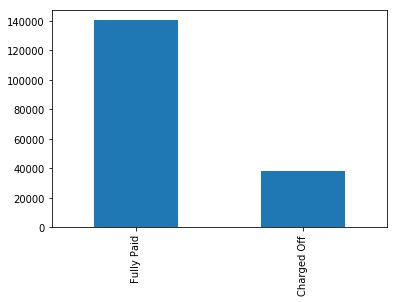

In [6]:
plt.figure()
df['loan_status'].value_counts(dropna=False).plot.bar()
plt.show()

In [7]:
#project.addManualRuleForDefault(ed.CLEANDATA_DROP_NA_FOR_COLUMN, 'loan_status')
df['loan_status'].replace(['Charged Off','Default'], 1, inplace=True)
df['loan_status'].replace(['Fully Paid','Completed'], 0, inplace=True)

#project.addManualRuleForDefault(ed.CLEANDATA_CONVERT_DATATYPE, 'loan_status','int64')
#project.addManualRuleForDefault(ed.CLEANDATA_CONVERT_DATATYPE, 'issue_d','datetime64')
df['loan_status'] = df['loan_status'].astype('int64')


0    140379
1     38413
Name: loan_status, dtype: int64

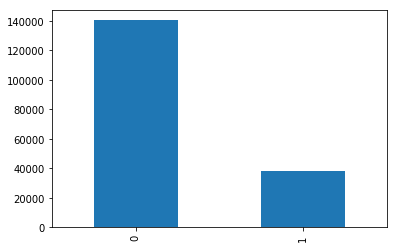

In [8]:
df['loan_status'].value_counts(dropna=False).plot.bar()
df['loan_status'].value_counts()

# Objects


## Term

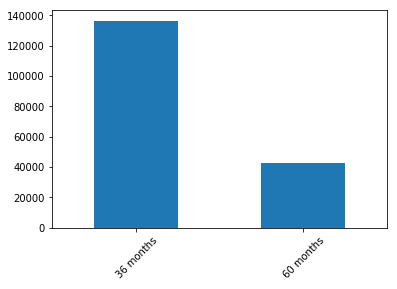

 36 months    136373
 60 months     42419
Name: term, dtype: int64

In [9]:
reviewObject(df,'term')

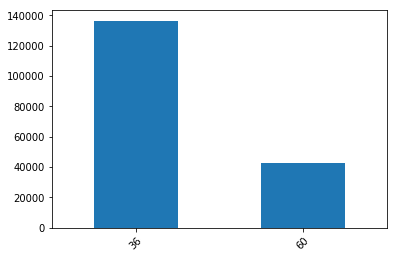

36    136373
60     42419
Name: term, dtype: int64

In [10]:
df['term'].replace([' 36 months','  36 months','36 months'], 36, inplace=True)
df['term'].replace(['  60 months',' 60 months','60 months'], 60, inplace=True)
df['term'] = df['term'].astype('int64')
reviewObject(df,'term')

## Grade

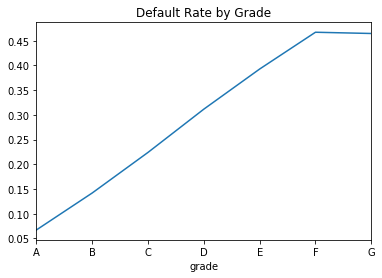

In [11]:
# Default Rate by Grade
df.groupby('grade')['loan_status'].mean().plot.line(title='Default Rate by Grade')

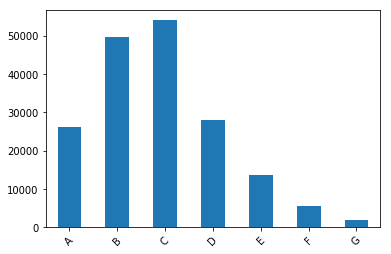

A    26248
B    49584
C    54018
D    27888
E    13626
F     5571
G     1857
Name: grade, dtype: int64

In [12]:

reviewObject(df,'grade')
#df['grade'].replace(['A'], 1, inplace=True)
#df['grade'].replace(['B'], 2, inplace=True)
#df['grade'].replace(['C'], 3, inplace=True)
#df['grade'].replace(['D'], 4, inplace=True)
#df['grade'].replace(['E'], 5, inplace=True)
#df['grade'].replace(['F'], 6, inplace=True)
#df['grade'].replace(['G'], 7, inplace=True)
#df['grade'].dropna(inplace=True)
#df['grade'] = df['grade'].astype('int64')

#plotCorr(df,['grade','int_rate'], size=None)

## home_ownership

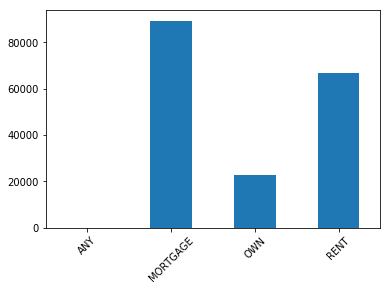

ANY            93
MORTGAGE    89376
OWN         22698
RENT        66625
Name: home_ownership, dtype: int64

In [13]:
reviewObject(df,'home_ownership')

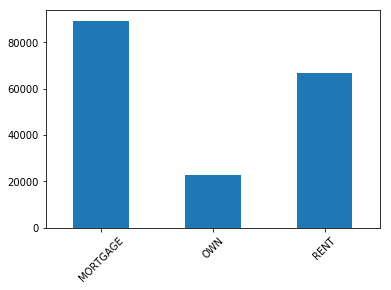

MORTGAGE    89376
OWN         22698
RENT        66625
Name: home_ownership, dtype: int64

In [14]:
# Replace ANY with rent
df.drop(df[df['home_ownership'] == 'ANY'].index, inplace=True)
reviewObject(df,'home_ownership')

## Verification Status

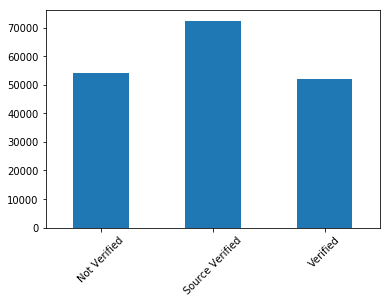

Not Verified       54237
Source Verified    72445
Verified           52017
Name: verification_status, dtype: int64

In [15]:
reviewObject(df,'verification_status')

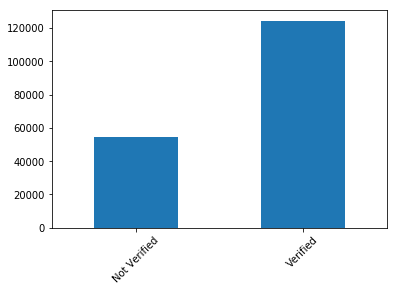

Not Verified     54237
Verified        124462
Name: verification_status, dtype: int64

In [16]:
df['verification_status'].replace(['Source Verified'], 'Verified', inplace=True)
reviewObject(df,'verification_status')

## Purpose

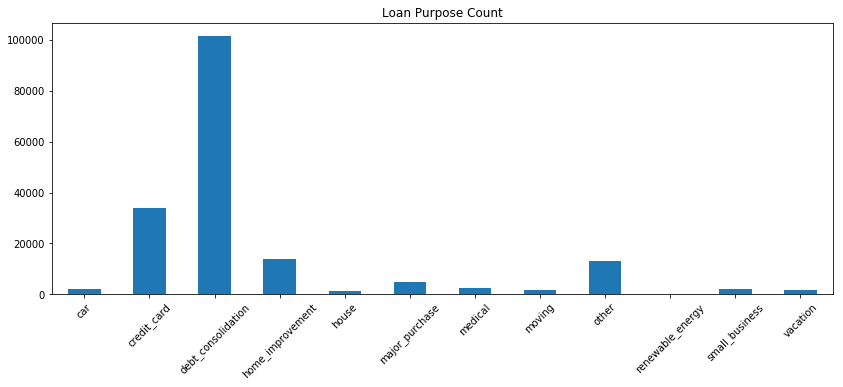

car                     2148
credit_card            33920
debt_consolidation    101695
home_improvement       14031
house                   1312
major_purchase          4752
medical                 2578
moving                  1600
other                  12987
renewable_energy         141
small_business          1948
vacation                1587
Name: purpose, dtype: int64

In [17]:
reviewObject(df,'purpose', size=(14,5), title='Loan Purpose Count')
df['purpose'].fillna('Missing',inplace = True)

## Zip Code

In [18]:
df['zip_code'].describe()

count     178699
unique       897
top        945xx
freq        2143
Name: zip_code, dtype: object

## Addr_state

In [19]:
df['addr_state'].describe()

count     178699
unique        50
top           CA
freq       26277
Name: addr_state, dtype: object

## emp_length

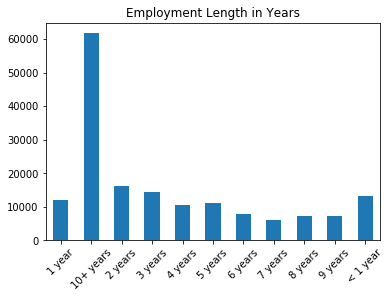

1 year       12121
10+ years    61738
2 years      16288
3 years      14312
4 years      10538
5 years      10995
6 years       7673
7 years       6129
8 years       7295
9 years       7113
< 1 year     13240
Name: emp_length, dtype: int64

In [20]:
reviewObject(df,'emp_length',title='Employment Length in Years')

In [21]:
df['emp_length'].replace(['< 1 year'], 6, inplace=True)
df['emp_length'].replace(['1 year'], 12, inplace=True)
df['emp_length'].replace(['2 years'], 24, inplace=True)
df['emp_length'].replace(['3 years'], 36, inplace=True)
df['emp_length'].replace(['4 years'], 48, inplace=True)
df['emp_length'].replace(['5 years'], 60, inplace=True)
df['emp_length'].replace(['6 years'], 72, inplace=True)
df['emp_length'].replace(['7 years'], 84, inplace=True)
df['emp_length'].replace(['8 years'], 96, inplace=True)
df['emp_length'].replace(['9 years'], 108, inplace=True)
df['emp_length'].replace(['10+ years'], 120, inplace=True)

df['emp_length'].fillna(0, inplace = True)
df['emp_length'] = df['emp_length'].astype('int64')

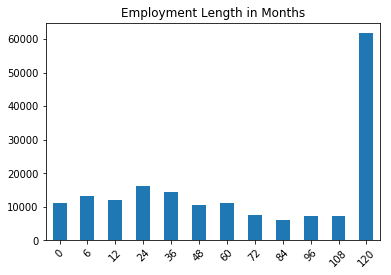

0      11257
6      13240
12     12121
24     16288
36     14312
48     10538
60     10995
72      7673
84      6129
96      7295
108     7113
120    61738
Name: emp_length, dtype: int64

In [22]:
reviewObject(df,'emp_length',title='Employment Length in Months')

## emp_title

In [23]:
#reviewObject(df,'emp_title')
#display(df['emp_title'].value_counts().sort_index())
df['emp_title'].describe()

count      167339
unique      58884
top       Manager
freq         3238
Name: emp_title, dtype: object

# Highly Correlated Data

## fico range low and high

<Figure size 432x288 with 0 Axes>

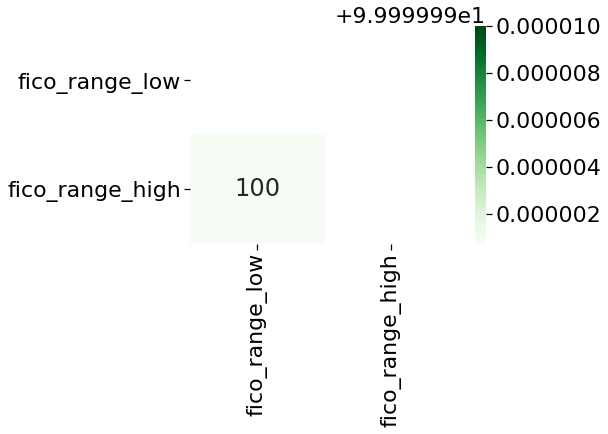

In [24]:
#df[['grade','term']].corr()
plotCorr(df,['fico_range_low','fico_range_high'], size=None)

In [25]:
df['AvgCreditScore'] = ( df['fico_range_low'] + df['fico_range_high'] ) / 2.0
df['AvgCreditScore'] = df['AvgCreditScore'].astype('int64')

# Missing Values

### Fill in missing data with zeros

This is making an assumption that the missing data means that there are no values to report vs unreported values.

In [26]:
missing = ['inq_last_6mths','mths_since_last_delinq','mths_since_last_record','revol_util',
           'mths_since_last_major_derog','open_acc_6m','open_act_il','open_il_12m','open_il_24m',
           'mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc',
           'inq_fi','inq_last_12m','avg_cur_bal','bc_open_to_buy','bc_util','mo_sin_old_il_acct',
           'mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq',
           'mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_tl_120dpd_2m','percent_bc_gt_75']

for x in missing:
    df[x].fillna(0, inplace = True)


# Outliers

- For annual_inc 15 outliers above 4200000.0
- For tot_coll_amt 2 outliers above 173380.0
- For acc_open_past_24mths 1 outliers above 56.0
- For mo_sin_rcnt_tl 2 outliers above 289.0
- For mort_acc 2 outliers above 37.0
- For num_actv_bc_tl 4 outliers above 29.0
- For num_sats 2 outliers above 80.0
- For num_tl_op_past_12m 4 outliers above 28.0
- For tot_hi_cred_lim 3 outliers above 9999999.0
- For total_bal_ex_mort 3 outliers above 1234429.0
- For total_bc_limit 1 outliers above 1105500.0
- For total_il_high_credit_limit 5 outliers above 1120706.0


In [27]:
outliers =[('annual_inc',4200000.0),
           ('tot_coll_amt',173380.0),
           ('acc_open_past_24mths',56.0),
           ('mo_sin_rcnt_tl',289.0),
           ('mort_acc',37.0),
           ('num_actv_bc_tl',29.0),
           ('num_sats',80.0),
           ('num_tl_op_past_12m',28.0),
           ('tot_hi_cred_lim',9999999.0),
           ('total_bal_ex_mort',1234429.0),
           ('total_bc_limit',1105500.0),
           ('total_il_high_credit_limit',1120706.0)]

#for col,val in outliers:
#    df.drop(df[df[col] >= val].index, inplace=True)

# Date Data

In [28]:
df['issue_d'] = df['issue_d'].astype('datetime64')
df['earliest_cr_line'] = df['earliest_cr_line'].astype('datetime64')

df['CreditHistoryMonths'] = ((abs(df['earliest_cr_line']- df['issue_d']))/np.timedelta64(1, 'M'))
df['CreditHistoryMonths'] = df['CreditHistoryMonths'].astype(int)

# External Data


External data to help supplement demographic data

## Replace 'addr_state', the borrowers state with the Cost of Living Index (COL)

In [29]:
if EXTERNALFEATURES:
    stateData = pd.read_csv('CostOfLivingByState.csv')
    stateData.rename(index=str,columns={'Code':'addr_state'}, inplace=True)
    toDrop = ['State','Median Income','Tax Burden', 'Unemployment Rate', 
              'Work-related Injury, Illness, and Fatality Rates']
    stateData.drop(toDrop, axis = 1, inplace=True)

In [30]:
if EXTERNALFEATURES:
    df = pd.merge(df, stateData, on='addr_state', how='left', validate="many_to_one")

## Update zipcode data with IRS demographic data

#### To create this file use: SummarizeIRSZipCodeData.ipynb

  - PREP	Number of returns with paid preparer's signature
  - N2	    Number of exemptions
  - ELDERLY	Number of elderly returns
  - A00100	Adjust gross income (AGI)
  - N02650	Number of returns with total income
  - A02650	Total income amount
  - N00200	Number of returns with salaries and wages
  - A00200	Salaries and wages amount
  - N00300	Number of returns with taxable interest
  - A00300	Taxable interest amount
  - N00600	Number of returns with ordinary dividends 
  - A00600	Ordinary dividends amount
  - N00650	Number of returns with qualified dividends
  - A00650	Qualified dividends amount
  - N00900	Number of returns with business or professional net income (less loss)
  - A00900	Business or professional net income (less loss) amount
  - N01000	Number of returns with net capital gain (less loss)
  - A01000	Net capital gain (less loss) amount
  - SCHF  	Number of farm returns
  - N02300	Number of returns with unemployment compensation
  - A02300	Unemployment compensation amount

In [31]:
if EXTERNALFEATURES:
    irsData = pd.read_csv('2016IRSZipCode3X.csv')
    irsData.head(5)

In [32]:
if EXTERNALFEATURES:
    irsData.rename(index=str,columns={'zipcode3':'zip_code'}, inplace=True)
    irsData.set_index('zip_code', inplace=True)

In [33]:
if EXTERNALFEATURES:
    irsDataFinal =pd.DataFrame(irsData, columns=['PREP','N2','ELDERLY','SCHF','N02300'])

In [34]:
if EXTERNALFEATURES:
    irsDataFinal.head(3)

In [35]:
if EXTERNALFEATURES:
    df = pd.merge(df, irsDataFinal, on='zip_code', how='left', validate="many_to_one")

In [36]:
if EXTERNALFEATURES:
    df.head(5)

# Remove columns not used

In [37]:
toDrop = ['int_rate', 'emp_title','zip_code',
          'fico_range_low', 'fico_range_high', 'issue_d','earliest_cr_line']
df.drop(toDrop, axis = 1, inplace=True)


# one-hot encode

In [38]:
# Prep the data
#Create new dataframe with dummy features
skipVariable = 'grade'

col = [x for x in df.dtypes[(df.dtypes=='object')].index] + [x for x in df.dtypes[(df.dtypes=='category')].index]
            
# Remove target variable from hot encoding
if skipVariable in col:
    col = [x for x in col if x != skipVariable]
                       
df = pd.get_dummies(df, columns=col)   
           
# Convert to float
for c in df:
    if c!=skipVariable:
        df[c] = df[c].astype('float64')

print ('Columns one-hot encoded:', col)

Columns one-hot encoded: ['home_ownership', 'verification_status', 'purpose', 'addr_state']


In [39]:
df.head(3)

,loan_amnt,term,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,11575.0,36.0,A,72.0,153000.0,0.0,16.99,0.0,0.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7200.0,36.0,E,24.0,50000.0,0.0,6.07,0.0,0.0,72.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,7500.0,36.0,A,84.0,110000.0,0.0,13.12,0.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Write Prepped File

In [40]:
# Final Cleanup
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [41]:
df.to_csv('LendingClub2017_2018FeatureReady.csv.gz',index=False,  compression='gzip')



In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178699 entries, 0 to 178791
Columns: 139 entries, loan_amnt to addr_state_WY
dtypes: float64(138), object(1)
memory usage: 190.9+ MB
